# International Sports Events: Window Dressing and Repression

This notebook is about partly replicating a study on the relationship between repression in autocratic regimes and international sports events inspired by the work of Scharpf, Gläßel and Pearce:

* Scharpf, A., Gläßel, C., Pearce, E. (2022) *International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup*, American Political Science Review, 1-18.  https://doi.org/10.1017/S0003055422000958.

---

> Alexios Doganis <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8190042@aueb.gr

## Pre-Work
We will first import all the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.formula.api as sm
import numpy as np
import itertools

### First Steps

First of all we are going to replicate Table SI.3.1 and SI.3.2 of the Supporting Information in order to get to know the dataset and make sure that we are heading in a good way.

For the Table SI.3.1 we are going to import data from *main_data.tab* available [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I). We only need the columns specified in *column_list* 

In [2]:
column_list = ["repression", "lnrepression" ,"dumrepression",
                "hostcity" ,"prox_hotelonly", "prox_hotelpress",
                "time" , "time2" ,"time3" , "lnpop_1970" ,
                "literacy_avg" , "vote_frejuli" ,"lnrebact1974" ,
                "lnrepression70_77" ,"latitude", "lnstrikes",
                "lnlag_strikes", "lnlag2_strikes",
                "zone1", "zone2", "zone3", "zone4", "zone5"]

tableSI31 = pd.read_csv("./data/main_data.tab", sep="\t",
                      usecols =column_list)[column_list] # we want to keep the order in column_list
tableSI31

,repression,lnrepression,dumrepression,hostcity,prox_hotelonly,prox_hotelpress,time,time2,time3,lnpop_1970,...,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,zone1,zone2,zone3,zone4,zone5
0,0.0,0.0,0.0,0.0,6.274075,6.274075,NaN,NaN,NaN,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,6.274075,6.274075,NaN,NaN,NaN,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,6.274075,6.274075,NaN,NaN,NaN,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,6.274075,6.274075,NaN,NaN,NaN,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,6.274075,6.274075,NaN,NaN,NaN,9.919902,...,1.098612,-37.199072,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,0.0,0.0,0.0,7.020316,7.089255,NaN,NaN,NaN,NaN,...,3.931826,-26.796579,0.0,0.0,0.0,0,0,1,0,0
133728,0.0,0.0,0.0,0.0,7.020316,7.089255,NaN,NaN,NaN,NaN,...,3.931826,-26.796579,0.0,0.0,0.0,0,0,1,0,0
133729,0.0,0.0,0.0,0.0,7.020316,7.089255,NaN,NaN,NaN,NaN,...,3.931826,-26.796579,0.0,0.0,0.0,0,0,1,0,0
133730,0.0,0.0,0.0,0.0,7.020316,7.089255,NaN,NaN,NaN,NaN,...,3.931826,-26.796579,0.0,0.0,0.0,0,0,1,0,0


We then rename colunms to be human readable.

In [3]:
column_names = {'repression':'Repression events',
           "lnrepression":'Repression events (logarithmized) ' ,
            "dumrepression":'Repression event',
            "hostcity":'Host City' ,
            "prox_hotelonly":'Proximity to Hotel',
            "prox_hotelpress":'Proximity to Journalist Venue',
            "time":'Time' ,
            "time2":'Time^2' ,
            "time3":'Time^3',
            "lnpop_1970" :'Population Size (logarithmized)',
            "literacy_avg":'Literacy Rate' ,
            "vote_frejuli":'Peronist Vote Share' ,
            "lnrebact1974":'Rebel Activity (logarithmized)' ,
            "lnrepression70_77" :'Past Repression (logarithmized)',
            "latitude":'Latitude',
            "lnstrikes":'Protest (logarithmized) Current month',
            "lnlag_strikes":'Protest (logarithmized) One month ago',
            "lnlag2_strikes":'Protest (logarithmized) Two months ago',
            "zone1":'Military Zone 1',
            "zone2":'Military Zone 2',
            "zone3":'Military Zone 3',
            "zone4":'Military Zone 4',
            "zone5":'Military Zone 5'}

tableSI31.rename(columns = column_names, inplace = True)

If we check for NaN values we see that the *Time* variable is missing a lot of values. The *Time* variable is crucial for our analysis and we can't work without it. So we are going to drop the rows with no value.

In [4]:
tableSI31.isna().sum()

Repression events                           465
Repression events (logarithmized)           465
Repression event                            465
Host City                                     0
Proximity to Hotel                          465
Proximity to Journalist Venue               465
Time                                      75349
Time^2                                    75349
Time^3                                    75349
Population Size (logarithmized)            4020
Literacy Rate                              4020
Peronist Vote Share                        2144
Rebel Activity (logarithmized)                0
Past Repression (logarithmized)               0
Latitude                                      0
Protest (logarithmized) Current month         0
Protest (logarithmized) One month ago         0
Protest (logarithmized) Two months ago        0
Military Zone 1                               0
Military Zone 2                               0
Military Zone 3                         

In [5]:
tableSI31 = tableSI31[tableSI31["Time"].notna()]

To get the summary and descriptive statistics of our table we are calling the *Dataframe.describe()* function

In [6]:
tableSI31 = tableSI31.describe()
tableSI31

,Repression events,Repression events (logarithmized),Repression event,Host City,Proximity to Hotel,Proximity to Journalist Venue,Time,Time^2,Time^3,Population Size (logarithmized),...,Past Repression (logarithmized),Latitude,Protest (logarithmized) Current month,Protest (logarithmized) One month ago,Protest (logarithmized) Two months ago,Military Zone 1,Military Zone 2,Military Zone 3,Military Zone 4,Military Zone 5
count,58107.000000,58107.000000,58107.000000,58383.000000,58107.000000,58107.000000,58383.00000,58383.000000,5.838300e+04,56628.000000,...,58383.000000,58383.000000,58383.000000,58383.000000,58383.000000,58383.000000,58383.000000,58383.000000,58383.000000,58383.000000
mean,0.005042,0.002910,0.003390,0.010020,7.000045,7.078650,0.59000,0.462167,4.072770e-01,9.701179,...,0.908222,-32.378240,0.009883,0.009246,0.008638,0.246493,0.220441,0.378758,0.020040,0.134269
std,0.103921,0.052788,0.058128,0.099598,1.613191,1.628709,0.33774,0.411383,4.600402e-01,1.336451,...,1.434340,5.459773,0.102008,0.099952,0.097890,0.430973,0.414548,0.485082,0.140139,0.340944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01000,0.000100,9.999999e-07,6.056784,...,0.000000,-54.748861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.005003,6.071971,0.30000,0.090000,2.700000e-02,8.777240,...,0.000000,-35.681238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,7.181212,7.248239,0.59000,0.348100,2.053790e-01,9.623011,...,0.000000,-32.197322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,8.343130,8.403231,0.88000,0.774400,6.814720e-01,10.529592,...,1.386294,-27.873781,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,7.000000,2.079442,1.000000,1.000000,9.398466,9.398466,1.17000,1.368900,1.601613e+00,14.904898,...,7.557473,-22.128710,2.079442,2.079442,2.079442,1.000000,1.000000,1.000000,1.000000,1.000000


We don't want the 25% 50% and 75% quintile values, so we only keep count, mean, std, min and max rows.

For better readability we also transpose the matrix and round values to 3 decimal places.

In [7]:
tableSI31 = tableSI31.T.loc[:,["count","mean","std","min","max"]].round(3)

We are also going to maually add a column that specifies if a variable is Count, Continous or Binary. 

In [8]:
tableSI31.insert(0, "Type", ["Count", "Continous", "Binary", "Binary",
                          "Continous", "Continous", "Count", "Count",
                          "Count", "Continous", "Continous", "Continous",
                          "Continous", "Continous", "Continous", "Continous",
                          "Continous", "Continous", "Binary", "Binary",
                          "Binary", "Binary", "Binary",], True)
tableSI31

,Type,count,mean,std,min,max
Repression events,Count,58107.0,0.005,0.104,0.000,7.000
Repression events (logarithmized),Continous,58107.0,0.003,0.053,0.000,2.079
Repression event,Binary,58107.0,0.003,0.058,0.000,1.000
Host City,Binary,58383.0,0.010,0.100,0.000,1.000
Proximity to Hotel,Continous,58107.0,7.000,1.613,0.000,9.398
Proximity to Journalist Venue,Continous,58107.0,7.079,1.629,0.000,9.398
Time,Count,58383.0,0.590,0.338,0.010,1.170
Time^2,Count,58383.0,0.462,0.411,0.000,1.369
Time^3,Count,58383.0,0.407,0.460,0.000,1.602
Population Size (logarithmized),Continous,56628.0,9.701,1.336,6.057,14.905


For the Table SI.3.2 we are again going to import data from *main_data.tab* available [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I). We only need the columns specified in the **new** *column_list* 

In [9]:
column_list = ["repression", "lnrepression" ,
                "hostcity" ,"postwc_time3mdum", "time_postwc",
                "time2_postwc" , "time3_postwc" , "lnpop_1970" ,
                "literacy_avg" , "vote_frejuli" ,"lnrebact1974" ,
                "lnrepression70_77", "zone1", "zone2", "zone3", "zone4", "zone5"]

tableSI32 = pd.read_csv("./data/main_data.tab", sep="\t",
                      usecols =column_list)[column_list] # we want to keep the order in column_list
tableSI32

,repression,lnrepression,hostcity,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone1,zone2,zone3,zone4,zone5
0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,0.0,0.0,1.0,1.13,1.2769,1.442897,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133728,0.0,0.0,0.0,1.0,1.14,1.2996,1.481544,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133729,0.0,0.0,0.0,1.0,1.15,1.3225,1.520875,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133730,0.0,0.0,0.0,1.0,1.16,1.3456,1.560896,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0


We again rename colunms to be human readable.

In [10]:
column_names = {'repression':'Repression events',
            "lnrepression":'Repression events (logarithmized) ' ,
            "hostcity":'Host City' ,
            "postwc_time3mdum":'Post World Cup Period' ,
            "time_postwc":'Time (Post World Cup)' ,
            "time2_postwc":'Time^2 (Post World Cup)' , 
            "time3_postwc":'Time^3 (Post World Cup)' ,
            "lnpop_1970" :'Population Size (logarithmized)',
            "literacy_avg":'Literacy Rate' ,
            "vote_frejuli":'Peronist Vote Share' ,
            "lnrebact1974":'Rebel Activity (logarithmized)' ,
            "lnrepression70_77" :'Past Repression (logarithmized)',
            "zone1":'Military Zone 1',
            "zone2":'Military Zone 2',
            "zone3":'Military Zone 3',
            "zone4":'Military Zone 4',
            "zone5":'Military Zone 5'}

tableSI32.rename(columns = column_names, inplace = True)

For the same reason, we drop rows with NaN *Time* values.

In [11]:
tableSI32.isna().sum()

Repression events                       465
Repression events (logarithmized)       465
Host City                                 0
Post World Cup Period                 75349
Time (Post World Cup)                 75349
Time^2 (Post World Cup)               75349
Time^3 (Post World Cup)               75349
Population Size (logarithmized)        4020
Literacy Rate                          4020
Peronist Vote Share                    2144
Rebel Activity (logarithmized)            0
Past Repression (logarithmized)           0
Military Zone 1                           0
Military Zone 2                           0
Military Zone 3                           0
Military Zone 4                           0
Military Zone 5                           0
dtype: int64

We repeat the previous steps to get the descriptive statistics summary table.

In [12]:
tableSI32 = tableSI32[tableSI32["Time (Post World Cup)"].notna()]
tableSI32 = tableSI32.describe()
tableSI32 = tableSI32.T.loc[:,["count","mean","std","min","max"]].round(3)
tableSI32.insert(0, "Type", ["Count", "Continous", "Binary", "Binary",
                          "Count", "Count", "Count", "Continous",
                          "Continous", "Continous", "Continous", "Continous",
                          "Binary", "Binary",
                          "Binary", "Binary", "Binary",], True)
tableSI32

,Type,count,mean,std,min,max
Repression events,Count,58321.0,0.004,0.096,0.000,9.000
Repression events (logarithmized),Continous,58321.0,0.002,0.047,0.000,2.303
Host City,Binary,58383.0,0.010,0.100,0.000,1.000
Post World Cup Period,Binary,58383.0,0.786,0.410,0.000,1.000
Time (Post World Cup),Count,58383.0,0.590,0.338,0.010,1.170
Time^2 (Post World Cup),Count,58383.0,0.462,0.411,0.000,1.369
Time^3 (Post World Cup),Count,58383.0,0.407,0.460,0.000,1.602
Population Size (logarithmized),Continous,56628.0,9.701,1.336,6.057,14.905
Literacy Rate,Continous,56628.0,0.717,0.110,0.316,0.901
Peronist Vote Share,Continous,57447.0,58.752,11.539,28.500,94.300


We are also going to replicate main paper Figure 1 and supporting information Figure SI.1.1

Figure 1 data are available as a seperate table [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)

In [13]:
f1 = pd.read_csv("./data/figure_1_data.tab", sep="\t")
f1

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


We use seaborn as the ploting library.

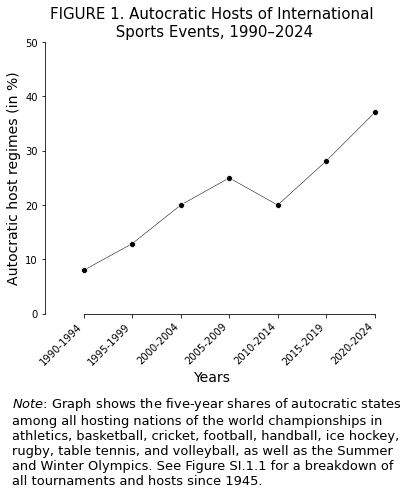

In [14]:
# set figure size
fig, ax = plt.subplots(figsize=(6,5))

# plot line with data points included 
sns.lineplot(y = f1["autochostperc"], x = f1["postcwy"],
             marker="o", color="black", linewidth = 0.5)

# set labels
plt.ylabel("Autocratic host regimes (in %)",fontsize=14)
plt.xlabel("Years",fontsize=14)

# rename and rotate x labels
plt.xticks([1,2,3,4,5,6,7],
           ['1990-1994', '1995-1999', '2000-2004',
            '2005-2009', '2010-2014', '2015-2019', '2020-2024']
           ,rotation=45,ha="right")

# set axis range
plt.ylim(0,50)
# more than (1,7) in order to create space for yaxis and edge dots
plt.xlim(0.2,7.1)

# hide top and right spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only draw spine between the y-ticks
ax.spines.bottom.set_bounds((1,7))

# set title
ax.set_title('FIGURE 1. Autocratic Hosts of International\n'+
             ' Sports Events, 1990–2024',fontsize=15)

# add note
_ = plt.figtext(0.05, -0.35, r"$\it{Note}$"+": Graph shows the five-year shares of autocratic states\n"
"among all hosting nations of the world championships in \n"
"athletics, basketball, cricket, football, handball, ice hockey, \n"
"rugby, table tennis, and volleyball, as well as the Summer \n"
"and Winter Olympics. See Figure SI.1.1 for a breakdown of \n"
"all tournaments and hosts since 1945.", ha="left", fontsize=13)

As for Figure 1, data for Figure SI.1.1 are again available as a seperate table [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)

In [15]:
fSI11 = pd.read_csv("./data/figure_SI11_data.tab", sep="\t")
fSI11

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN
329,2014.0,0.0,27.5,28.0,NaN
330,2018.0,0.0,27.5,28.0,NaN
331,2018.0,0.0,27.5,28.0,NaN


This time the plot can't be done using a predifined library function, so we are going to built it from scrach with matplotlib.

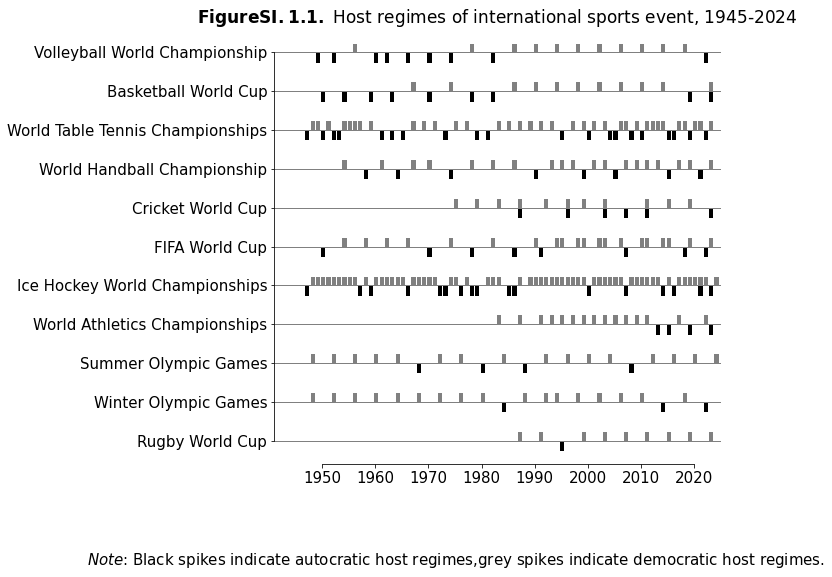

In [16]:
# set figure size
fig, ax = plt.subplots(figsize=(8,8))

# draw lines and rectangles
for x in fSI11["baseline"].unique(): # every event has a different baseline value
    
    plt.axhline(x, color='grey', linewidth=1) # horizontal lines
    
    temp_df = fSI11[fSI11["baseline"] == x] # partition of the dataframe containing a single event
    
    for index, row in temp_df.iterrows():
        if row["regime"] == 0: # democratic
            # draw rectangle
            left, bottom, width, height = (row["year"], row["baseline"], 0.4, 0.5)
            rect=mpatches.Rectangle((left,bottom),width,height, 
                                    color="grey",
                                   linewidth=2)
            plt.gca().add_patch(rect)
        else: # autocratic
            # draw rectangle
            left, bottom, width, height = (row["year"], row["baseline"]-0.1, 0.4, -0.5)
            rect=mpatches.Rectangle((left,bottom),width,height, 
                                    color="black",
                                   linewidth=2)
            plt.gca().add_patch(rect)


# rename y labels and increase font sizes
plt.yticks([2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5],
           ["Rugby World Cup","Winter Olympic Games","Summer Olympic Games",
            "World Athletics Championships","Ice Hockey World Championships",
            "FIFA World Cup","Cricket World Cup",
            "World Handball Championship","World Table Tennis Championships",
            "Basketball World Cup","Volleyball World Championship"], fontsize=15)
plt.xticks(fontsize=15)

# set axis range
plt.ylim(1,29)
plt.xlim(1941,2025)

# hide top and right spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only draw spine between the y-ticks
ax.spines.bottom.set_bounds((1950,2020))
ax.spines.left.set_bounds((2.5,27.5))

# set title
ax.set_title(r"$\bf{Figure SI.1.1.}$"+' Host regimes of international sports event, 1945-2024',fontsize=17)

# add note
_ = plt.figtext(-0.2, -0.05, r"$\it{Note}$"+": Black spikes indicate autocratic host regimes,"+
                "grey spikes indicate democratic host regimes.", ha="left", fontsize=15)

### Repression in Departments with and without Host Cities

The authors formulate two hypotheses:

* H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

* H2: During an international sports tournament, state repression drops in host cities but remains unchanged in other cities.

They validate their hypotheses using a series of regression analyses. They use negative binomial regression models, but they find that their findings are robust with Ordinary Least Squares (OLS), so we'll use OLS.

We will run the three first models of Table 1 of the main paper. Partial report of the results can be found in Table SI.4.1 of the Supporting Information.

We will import the *main_data.tab* containing all the nessecery information.

In [17]:
table1 = pd.read_csv("./data/main_data.tab", sep="\t",
                      usecols =["repression", "lnrepression" ,"dumrepression", "hostcity", "time", "time2",
                                "lnpop_1970", "vote_frejuli", "literacy_avg", "lnrebact1974", "lnrepression70_77",
                                "zone2", "zone3", "zone4", "zone5"])

table1

,repression,lnrepression,dumrepression,hostcity,time,time2,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
0,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
1,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
2,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
3,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
4,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133728,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133729,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133730,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0


For the first model we perform a regression with depended variable the logarithmized repression and hostcity and time as the independed ones.

In [18]:
result1 = sm.ols(formula="lnrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2",
                data=table1).fit(cov_type="HC1")

For the second model we perform the same regression, but we add some control variables.

In [19]:
result2 = sm.ols(formula="lnrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2+lnpop_1970" +
                "+vote_frejuli+literacy_avg+lnrebact1974+lnrepression70_77", data=table1).fit(cov_type="HC1")

For the third model we enrich the second model with zone fixed effects.

In [20]:
result3 = sm.ols(formula="lnrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2+lnpop_1970" +
                "+vote_frejuli+literacy_avg+lnrebact1974+lnrepression70_77+zone2+zone3+zone4+zone5",
                 data=table1).fit(cov_type="HC1")

We will define a function that returns the desired symbol according to the p value given.

In [21]:
def get_stars(pv):
    if pv < 0.001:
        return "***"
    elif pv < 0.01:
        return "**"
    elif pv < 0.05:
        return "*"
    elif pv < 0.1:
        return "†"
    else:
        return ""

Now let's print those results in a table

In [22]:
# The reported variable names
variables = ['Constant','Host City x Time', 'Host City x Time^2', 'Host City',
            'Time','Time^2', 'Population size', 'Literacy rate', 'Peronist vote share',
            'Rebel activity', 'Past repression']

# header
print("Table SI.4.1 Repression in Departments with and without Host Cities")
print("-------------------------------------------------------------------")
print(f"{'(1)':>30}",f"{'(2)':>15}",f"{'(3)':>15}")
print("-------------------------------------------------------------------")

# every variable's results
for v, p1, p2, p3, pv1, pv2, pv3, se1, se2, se3 in itertools.zip_longest(variables,
                                 result1.params.values,
                                 result2.params.values,
                                 result3.params.values,
                                 result1.pvalues.values,
                                 result2.pvalues.values,
                                 result3.pvalues.values,
                                 result1.HC1_se.values,
                                 result2.HC1_se.values,
                                 result3.HC1_se.values,fillvalue=0):
    
    if v == 0:
        # no more variables
        break;
    
    # p value stars
    pv1 = get_stars(pv1)
    pv2 = get_stars(pv2)
    pv3 = get_stars(pv3)
    
    # variable coefficient + stars
    print(f'{v:<24}',f'{"%.3f" % p1 + pv1:<15}' if p1 != 0 else f'{"":<15}',
          f'{"%.3f" % p2 + pv2:<15}' if p2 != 0 else f'{"":<15}',
          f'{"%.3f" % p3 + pv3:<15}' if p3 != 0 else f'{"":<15}')
    
    # standard errors
    print(f'{"("+"%.3f" % se1 + ")":>32}' if p1 != 0 else f'{"":>32}',
          f'{"("+"%.3f" % se2 + ")":>15}' if p2 != 0 else f'{"":>15}',
          f'{"("+"%.3f" % se3 + ")":>15}' if p3 != 0 else f'{"":>15}')
              
# control variables
print(f'{"Controls":<24}',f'{"NO":<15}',
          f'{"YES":<15}',
          f'{"YES":<15}')

# zone fixed effects
print(f'{"Zone FE":<24}',f'{"NO":<15}',
          f'{"NO":<15}',
          f'{"YES":<15}')

print("-------------------------------------------------------------------")

# F statistic value + stars
print(f'{"F Statistic":<24}',f'{"%.2f" % result1.fvalue + get_stars(result1.f_pvalue):<15}',
          f'{"%.2f" % result2.fvalue + get_stars(result2.f_pvalue):<15}',
          f'{"%.2f" % result3.fvalue + get_stars(result3.f_pvalue):<15}')

# R squared
print(f'{"R^2":<24}',f'{"%.2f" % result1.rsquared :<15}',
          f'{"%.2f" % result2.rsquared :<15}',
          f'{"%.2f" % result3.rsquared :<15}')

# Observations
print(f'{"Observarions":<24}',f'{int(result1.nobs):<15}',
          f'{int(result2.nobs):<15}',
          f'{int(result2.nobs):<15}')

# note
print("-------------------------------------------------------------------")
print("Note: Values are coefficients with robust standard errors\n"+
      "in parentheses.† p<0.1, * p<0.05, ** p<0.01, *** p<0.001")

Table SI.4.1 Repression in Departments with and without Host Cities
-------------------------------------------------------------------
                           (1)             (2)             (3)
-------------------------------------------------------------------
Constant                 0.003***        -0.004*         -0.004†        
                         (0.001)         (0.002)         (0.002)
Host City x Time         0.401**         0.401**         0.401**        
                         (0.144)         (0.143)         (0.142)
Host City x Time^2       -0.323**        -0.323**        -0.323**       
                         (0.110)         (0.110)         (0.109)
Host City                0.020           -0.004          -0.004         
                         (0.034)         (0.034)         (0.034)
Time                     -0.003          -0.003          -0.003         
                         (0.002)         (0.002)         (0.002)
Time^2                   0.002           0.

From the above table we can reach certain conclusions.

First of all we see that both interaction terms (Host City x Time and Host City x Time^2) point in the expected direction to strengthen both hypotheses and are statistically significant (p < 0.01). This means that the positive *+0.401* coefficient of the interaction between Host City and Time and the negative *-0.323* coefficient of the interaction between Host City and Time^2 indicate that repression in host cities first went up and then, while the time passes and the time^2 variable gets stronger, again dropped. In contrast for the non host cities (Host City = 0) the independent variables coefficients doesn't play any significant role in changing the predicted repression, so it remains relatively unchanged.

This will be visually explained in the upcoming graph.

### Graphical Overview of Effects 

Next we will replicate Figure 5 of the main paper using our model and enrich it with relevant information from the data.

We will again import the *main_data.tab* file.

In [23]:
f5 = pd.read_csv("./data/main_data.tab", sep="\t",
                      usecols =["repression", "lnrepression" ,"dumrepression", "hostcity", "time", "time2",
                                "lnpop_1970", "vote_frejuli", "literacy_avg", "lnrebact1974", "lnrepression70_77",
                                "zone2", "zone3", "zone4", "zone5","date"])

f5

,repression,lnrepression,dumrepression,hostcity,date,time,time2,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
0,0.0,0.0,0.0,0.0,1978-01-01,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
1,0.0,0.0,0.0,0.0,1978-01-02,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
2,0.0,0.0,0.0,0.0,1978-01-03,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
3,0.0,0.0,0.0,0.0,1978-01-04,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
4,0.0,0.0,0.0,0.0,1978-01-05,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,0.0,0.0,0.0,1978-09-21,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133728,0.0,0.0,0.0,0.0,1978-09-22,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133729,0.0,0.0,0.0,0.0,1978-09-23,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133730,0.0,0.0,0.0,0.0,1978-09-24,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0


We are going to split the DataFrame based on the column *hostcity* which indicates that the row contains data about a host city or not.

In [24]:
f5host = f5[f5["hostcity"] == 1]

In [25]:
f5other = f5[f5["hostcity"] == 0]

To enrich the figure we are going to show the days that no repression events happened in the whole country of Argentina.

To do that we sum the *dumprepression* variable based on the dates.

In [26]:
repressions = f5.loc[:,["dumrepression","date"]]
repressions = repressions.groupby("date").sum()
repressions

,dumrepression
date,
1978-01-01,1.0
1978-01-02,2.0
1978-01-03,1.0
1978-01-04,3.0
1978-01-05,1.0
...,...
1978-09-21,0.0
1978-09-22,1.0
1978-09-23,1.0


We only keep the zero repression dates for our plot.

In [27]:
norepressions = repressions[repressions["dumrepression"]==0]
norepressions = norepressions.merge(f5.loc[:,["date","time"]].drop_duplicates(),how="left",on="date").dropna()
norepressions.head()

,date,dumrepression,time
9,1978-03-07,0.0,0.07
10,1978-03-12,0.0,0.12
11,1978-03-18,0.0,0.18
12,1978-03-19,0.0,0.19
13,1978-03-21,0.0,0.21


Now let's plot the figure.

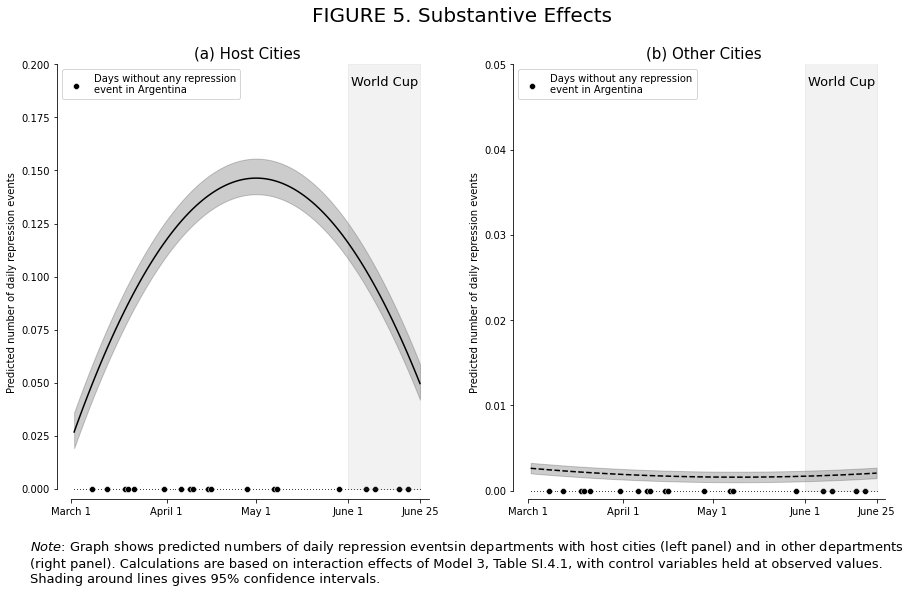

In [28]:
# set figure size
fig, ax = plt.subplots(1,2,figsize=(15,8))

# draw the predicted values
sns.lineplot(x=f5host["time"],y=result3.predict(f5host),ax=ax[0],color="black",seed=42)
sns.lineplot(x=f5other["time"],y=result3.predict(f5other),ax=ax[1], linestyle='--',color="black",seed=42)

# draw observed values
sns.scatterplot(x=f5host["time"],y=f5host["lnrepression"],ax=ax[0],s=1,color="black")
sns.scatterplot(x=f5other["time"],y=f5other["lnrepression"],ax=ax[1],s=1,color="black")

# draw days without repression in Argentina
sns.scatterplot(x ="time" ,y = "dumrepression",data= norepressions,ax=ax[0],color="black"
                , label="Days without any repression\nevent in Argentina")
sns.scatterplot(x ="time" ,y = "dumrepression",data= norepressions,ax=ax[1],color="black"
                , label="Days without any repression\nevent in Argentina")

# set axis range
ax[0].set_ylim(-0.005,0.2)
ax[1].set_ylim(-0.001,0.05)

# draw World Cup Rectangles
left, bottom, width, height = (0.93, 0, 1.17-0.93, 0.2)
ax[0].add_patch(mpatches.Rectangle((left,bottom),width,height, 
                        color="grey", alpha=0.1))
ax[1].add_patch(mpatches.Rectangle((left,bottom),width,height, 
                        color="grey", alpha=0.1))
ax[0].text(0.94, 0.19,"World Cup",fontsize=13)
ax[1].text(0.94, 0.0475,"World Cup",fontsize=13)

# set labels
ax[0].set_ylabel("Predicted number of daily repression events")
ax[1].set_ylabel("Predicted number of daily repression events")
ax[0].set_xlabel("")
ax[1].set_xlabel("")

# set x ticks labels
ax[0].set_xticks([0,0.32, 0.62,0.93, 1.17])
ax[1].set_xticks([0,0.32, 0.62,0.93, 1.17])
ax[0].set_xticklabels(["March 1","April 1", "May 1","June 1", "June 25"])
ax[1].set_xticklabels(["March 1","April 1", "May 1","June 1", "June 25"])


# hide top and right spines
ax[0].spines.right.set_visible(False)
ax[0].spines.top.set_visible(False)
ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)


# Only draw spine between the specified ticks
ax[0].spines.bottom.set_bounds((0,1.2))
ax[0].spines.left.set_bounds((0,0.2))
ax[1].spines.bottom.set_bounds((0,1.2))
ax[1].spines.left.set_bounds((0,0.05))

# set subplots titles
ax[0].set_title('(a) Host Cities',fontsize=15)
ax[1].set_title('(b) Other Cities',fontsize=15)

# set figure title
fig.suptitle("FIGURE 5. Substantive Effects", fontsize=20)

# add note
plt.figtext(0.1, -0.02, r"$\it{Note}$"+": Graph shows predicted numbers of daily repression events"+
            "in departments with host cities (left panel) and in other departments\n"+
            "(right panel). Calculations are based on interaction effects of Model 3, "+
            "Table SI.4.1, with control variables held at observed values. \n"+
            "Shading around lines gives 95% confidence intervals.", ha="left", fontsize=13)

# show legend
plt.legend()

For this figure we have splited the data into the World Cup host or not cities. As explained in the previous question we see that, for the host cities, repression events increase as the World Cup approaches, then suddenly decrease again. With these actions, it is likely that the Argentine junta wanted to suppress the public voice and present the country ideally to the rest of the world, as if the authoritarian regime works for the best of the country's people. But when the World Cup is about to start and people and journalists from all over the world gathered in the host cities, the government decides to decrease the repression events in order not to be exposed to foreign independent media. Whereas in the non host cities, the junda didn't have to implement such practises, so the total number of repression events remain low and consistent. With large black dots we can see the only dates that there was not one repression event in the whole Argentina country. Ιt is interesting that between April 1st and June 1st (91 days period) only 9 days passed without a single repression event. That shows the intensity of them and how much the government wanted to present the country as a perfect place.

### Robustness Check Using a Dichotomous Indicator of Repression
As an additional robustness check, the authors run logistic regressions using a binary outcome variable for regression. They report their results in Table SI.4.5 of the Supplementary Information; We will replicate these results.

Once again we need to import the *main_data.tab* file.

In [29]:
tableSI45 = pd.read_csv("./data/main_data.tab", sep="\t",
                      usecols =["dumrepression", "hostcity", "time", "time2",
                                "lnpop_1970", "vote_frejuli", "literacy_avg", "lnrebact1974", "lnrepression70_77",
                                "zone2", "zone3", "zone4", "zone5"])
tableSI45

,dumrepression,hostcity,time,time2,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
1,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
2,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
3,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
4,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133728,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133729,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133730,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0


For the first model we perform a logistic regression with depended variable the dummy repression, hostcity and time as the independed ones.

In [30]:
result1 = sm.logit(formula="dumrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2",
                   data=tableSI45).fit(cov_type='HC1',disp=False)
x_vars = result1.summary2().tables[1].index
wald_str = ' = '.join(list(x_vars[1:]))
wald_test1 = result1.wald_test(wald_str + " = 0", scalar=True)

For the second model we perform the same logistic regression, but we add control variables.

In [31]:
result2 = sm.logit(formula="dumrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2+"+
                  "lnpop_1970+vote_frejuli+literacy_avg+lnrebact1974+lnrepression70_77",
                   data=tableSI45).fit(cov_type='HC1',disp=False)

x_vars = result2.summary2().tables[1].index
wald_str = ' = '.join(list(x_vars[1:]))
wald_test2 = result2.wald_test(wald_str + " = 0", scalar=True)

For the third model we enrich the second model with zone fixed effects.

In [32]:
result3 = sm.logit(formula="dumrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2+"+
                  "lnpop_1970+vote_frejuli+literacy_avg+lnrebact1974"+
                  "+lnrepression70_77+zone2+zone3+zone4+zone5",
                   data=tableSI45).fit(cov_type='HC1',disp=False)

x_vars = result3.summary2().tables[1].index
wald_str = ' = '.join(list(x_vars[1:]))
wald_test3 = result3.wald_test(wald_str + " = 0", scalar=True)

Finally we print the results table.

In [33]:
# The reported variable names
variables = ['Constant','Host City x Time', 'Host City x Time^2', 'Host City',
            'Time','Time^2']

# header
print("Table SI.4.5. Regression results for binary variable of repression")
print("------------------------------------------------------------------")
print(f"{'(1)':>30}",f"{'(2)':>15}",f"{'(3)':>15}")
print("------------------------------------------------------------------")

# every variable's results
for v, p1, p2, p3, pv1, pv2, pv3, se1, se2, se3 in itertools.zip_longest(variables,
                                         result1.params.values,
                                         result2.params.values,
                                         result3.params.values,
                                         result1.pvalues.values,
                                         result2.pvalues.values,
                                         result3.pvalues.values,
                                         result1.bse.values,
                                         result2.bse.values,
                                         result3.bse.values, fillvalue=0):
    if v == 0:
        # no more variables
        break;
    
    # p value stars
    pv1 = get_stars(pv1)
    pv2 = get_stars(pv2)
    pv3 = get_stars(pv3)

    # variable coefficient + stars
    print(f'{v:<24}',f'{"%.3f" % p1 + pv1:<15}' if p1 != 0 else f'{"":<15}',
          f'{"%.3f" % p2 + pv2:<15}' if p2 != 0 else f'{"":<15}',
          f'{"%.3f" % p3 + pv3:<15}' if p3 != 0 else f'{"":<15}')

    # standard errors
    print(f'{"("+"%.3f" % se1 + ")":>32}' if p1 != 0 else f'{"":>32}',
          f'{"("+"%.3f" % se2 + ")":>15}' if p2 != 0 else f'{"":>15}',
          f'{"("+"%.3f" % se3 + ")":>15}' if p3 != 0 else f'{"":>15}')
              
# control variables
print(f'{"Controls":<24}',f'{"NO":<15}',
          f'{"YES":<15}',
          f'{"YES":<15}')

# zone fixed effects
print(f'{"Observarions":<24}',f'{"NO":<15}',
          f'{"NO":<15}',
          f'{"YES":<15}')

print("------------------------------------------------------------------")

# Wald Chi^2 value + stars
print(f'{"Wald Chi^2":<24}',f'{"%.2f" % wald_test1.statistic + get_stars(wald_test1.pvalue):<15}',
          f'{"%.2f" % wald_test2.statistic + get_stars(wald_test2.pvalue):<15}',
          f'{"%.2f" % wald_test3.statistic + get_stars(wald_test3.pvalue):<15}')

# Pseudo R squared
print(f'{"Pseudo R^2":<24}',f'{"%.2f" % result1.prsquared :<15}',
          f'{"%.2f" % result2.prsquared :<15}',
          f'{"%.2f" % result3.prsquared :<15}')

# Observations
print(f'{"Observarions":<24}',f'{int(result1.nobs):<15}',
          f'{int(result2.nobs):<15}',
          f'{int(result2.nobs):<15}')

# note
print("------------------------------------------------------------------")
print("Note: Values are coefficients with robust standard errors\n"+
      "in parentheses.† p<0.1, * p<0.05, ** p<0.01, *** p<0.001")

Table SI.4.5. Regression results for binary variable of repression
------------------------------------------------------------------
                           (1)             (2)             (3)
------------------------------------------------------------------
Constant                 -5.851***       -17.248***      -15.402***     
                         (0.267)         (3.181)         (3.161)
Host City x Time         4.140*          4.869*          5.378*         
                         (2.081)         (2.119)         (2.267)
Host City x Time^2       -3.214*         -3.798*         -4.217*        
                         (1.600)         (1.647)         (1.774)
Host City                3.138***        -1.627**        -1.327†        
                         (0.576)         (0.628)         (0.690)
Time                     -0.873          -0.993          -0.992         
                         (1.067)         (1.088)         (1.086)
Time^2                   0.535           0.618

### Robustness Check Using Matched Samples

Another robustness check that the authors have undertaken is to run regression analyses on matched samples. They have created subsets of the data that pair similar departments with and without host cities. The matching has been carried out both manually, by using the range of population size, and algorithmically. We will focus on the simple, manual matching.

We will replicate table SI.4.7 of the Supplementary Information and recreate Figure 6 of the main paper.

Same as always we import the *main_data.tab* file

In [34]:
tableSI47 = pd.read_csv("./data/main_data.tab", sep="\t",
                      usecols =["repression", "lnrepression" ,"dumrepression", "hostcity", "time", "time2",
                                "lnpop_1970", "vote_frejuli", "literacy_avg", "lnrebact1974", "lnrepression70_77",
                                "zone2", "zone3", "zone4", "zone5", "matched_simple"])
tableSI47

,repression,lnrepression,dumrepression,hostcity,time,time2,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_simple
0,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
1,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
2,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
3,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
4,0.0,0.0,0.0,0.0,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133728,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133729,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133730,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN


For our table we will focus in the data that are simply matched

In [35]:
tableSI47 = tableSI47[tableSI47["matched_simple"] == 1]

For the first model we perform an Ordinary Least Squares regression with depended variable the logarithmized repression and hostcity and time as the independed ones.

In [36]:
result1 = sm.ols(formula="lnrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2",
                data=tableSI47).fit(cov_type="HC1")

For the second model we perform the same regression, but we add some control variables.

In [37]:
result2 = sm.ols(formula="lnrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2+lnpop_1970" +
                "+vote_frejuli+literacy_avg+lnrebact1974+lnrepression70_77",
                data=tableSI47).fit(cov_type="HC1")

For the third model we enrich the second model with zone fixed effects.

In [38]:
result3 = sm.ols(formula="lnrepression ~ hostcity:time+hostcity:time2+hostcity+time+time2+lnpop_1970" +
                "+vote_frejuli+literacy_avg+lnrebact1974+lnrepression70_77+zone2+zone3+zone4+zone5",
                 data=tableSI47).fit(cov_type="HC1")

And once again we print the results table.

In [39]:
# The reported variable names
variables = ['Constant','Host City x Time', 'Host City x Time^2', 'Host City',
            'Time','Time^2']

# header
print("Table SI.4.7. Linear regressions (OLS) for matched samples")
print("------------------------------------------------------------------")
print(f"{'(1)':>30}",f"{'(2)':>15}",f"{'(3)':>15}")
print("------------------------------------------------------------------")

# every variable's results
for v, p1, p2, p3, pv1, pv2, pv3, se1, se2, se3 in itertools.zip_longest(variables,
                                 result1.params.values,
                                 result2.params.values,
                                 result3.params.values,
                                 result1.pvalues.values,
                                 result2.pvalues.values,
                                 result3.pvalues.values,
                                 result1.HC1_se.values,
                                 result2.HC1_se.values,
                                 result3.HC1_se.values,fillvalue=0):
    if v == 0:
        # no more variables
        break;

    # p value stars
    pv1 = get_stars(pv1)
    pv2 = get_stars(pv2)
    pv3 = get_stars(pv3)
    
    # variable coefficient + stars
    print(f'{v:<24}',f'{"%.3f" % p1 + pv1:<15}' if p1 != 0 else f'{"":<15}',
          f'{"%.3f" % p2 + pv2:<15}' if p2 != 0 else f'{"":<15}',
          f'{"%.3f" % p3 + pv3:<15}' if p3 != 0 else f'{"":<15}')

    # standard errors
    print(f'{"("+"%.3f" % se1 + ")":>32}' if p1 != 0 else f'{"":>32}',
          f'{"("+"%.3f" % se2 + ")":>15}' if p2 != 0 else f'{"":>15}',
          f'{"("+"%.3f" % se3 + ")":>15}' if p3 != 0 else f'{"":>15}')
              
# control variables
print(f'{"Controls":<24}',f'{"NO":<15}',
          f'{"YES":<15}',
          f'{"YES":<15}')

# zone fixed effects
print(f'{"Zone FE":<24}',f'{"NO":<15}',
          f'{"NO":<15}',
          f'{"YES":<15}')

print("------------------------------------------------------------------")

# F statistic value + stars
print(f'{"F Statistic":<24}',f'{"%.2f" % result1.fvalue + get_stars(result1.f_pvalue):<15}',
          f'{"%.2f" % result2.fvalue + get_stars(result2.f_pvalue):<15}',
          f'{"%.2f" % result3.fvalue + get_stars(result3.f_pvalue):<15}')

# R squared
print(f'{"R^2":<24}',f'{"%.2f" % result1.rsquared :<15}',
          f'{"%.2f" % result2.rsquared :<15}',
          f'{"%.2f" % result3.rsquared :<15}')

# Observations
print(f'{"Observarions":<24}',f'{int(result1.nobs):<15}',
          f'{int(result2.nobs):<15}',
          f'{int(result2.nobs):<15}')

# note
print("------------------------------------------------------------------")
print("Note: Values are coefficients with robust standard errors\n"+
      "in parentheses.† p<0.1, * p<0.05, ** p<0.01, *** p<0.001")

Table SI.4.7. Linear regressions (OLS) for matched samples
------------------------------------------------------------------
                           (1)             (2)             (3)
------------------------------------------------------------------
Constant                 0.029***        -0.937***       -0.978***      
                         (0.008)         (0.141)         (0.172)
Host City x Time         0.424**         0.424**         0.424**        
                         (0.148)         (0.135)         (0.131)
Host City x Time^2       -0.341**        -0.341**        -0.341***      
                         (0.113)         (0.105)         (0.102)
Host City                -0.006          -0.100**        -0.077*        
                         (0.035)         (0.035)         (0.033)
Time                     -0.026          -0.026          -0.026         
                         (0.031)         (0.031)         (0.031)
Time^2                   0.020           0.020        

For the replication of Figure 6 we again split the data based on the *hostcity* column

In [40]:
tableSI47host = tableSI47[tableSI47["hostcity"]==1]

In [41]:
tableSI47other = tableSI47[tableSI47["hostcity"]==0]

And we plot the final figure

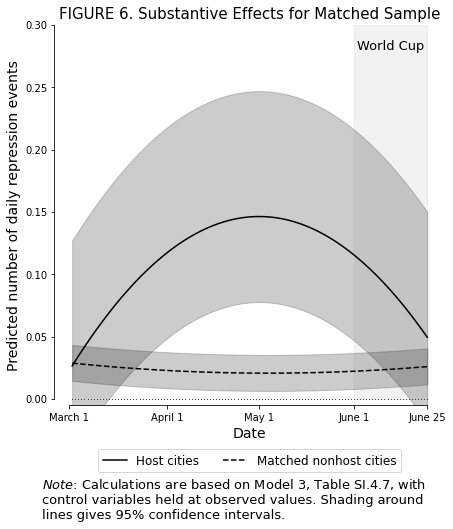

In [42]:
# set figure size
fig, ax = plt.subplots(figsize=(7,7))

# draw the predicted values
sns.lineplot(x=tableSI47host["time"],y=result3.predict(tableSI47host)
             ,color="black", label='Host cities',seed=42)
sns.lineplot(x=tableSI47other["time"],y=result3.predict(tableSI47other)
             ,color="black", label='Matched nonhost cities',seed=42, linestyle='--')

# draw observed values
sns.scatterplot(x=tableSI47["time"],y=tableSI47["lnrepression"],s=1,color="black")


# set axis range
plt.ylim(-0.005,0.3)

# draw World Cup Rectangle
left, bottom, width, height = (0.93, 0, 1.17-0.93, 0.3)
ax.add_patch(mpatches.Rectangle((left,bottom),width,height, 
                        color="grey", alpha=0.1))
ax.text(0.94, 0.28,"World Cup",fontsize=13)

# set labels
ax.set_ylabel("Predicted number of daily repression events",fontsize=14)
ax.set_xlabel("Date",fontsize=14)

# set x ticks labels
ax.set_xticks([0,0.32, 0.62,0.93, 1.17])
ax.set_xticklabels(["March 1","April 1", "May 1","June 1", "June 25"])


# hide top and right spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


# Only draw spine between the specified ticks
ax.spines.bottom.set_bounds((0,1.17))
ax.spines.left.set_bounds((0,0.3))

# set figure title
ax.set_title('FIGURE 6. Substantive Effects for Matched Sample',fontsize=15)

# move legent under the figure
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2,fontsize=12)

# add note
_ = plt.figtext(0.1, -0.1, r"$\it{Note}$"+": Calculations are based on Model 3, Table SI.4.7, with\n"+
            "control variables held at observed values. Shading around \n"+
            "lines gives 95% confidence intervals.", ha="left", fontsize=13)

These results, as mentioned above, are calculated on matched samples. This technic checks the robustenss of the results with matched samples that pair similar departments with and without host cities. The prosedure the authors call *manual maching* and that we are using here, uses the range of Population size (min–max) of all departments with host cities to  select those departments without host cities into the control group. The sample thus excludes small, sparsely populated departments. Once again we conclude to the same pattern that repression events increase before the World Cup and decrease when it is approaching. As before the Host City x Time interaction term has a positive coefficient and the Host City x Time^2 a negative one and both statistically significant. Our results are therefore robust to sample compositions and unlikely to be driven by covariate imbalances or model dependencies.